Kolmogorov-Smirnov statistic: 0.18288459107571736
P-value: 0.003475687581132526


/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/1400426092.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalog['DATETIME'] = pd.to_datetime(catalog['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/1400426092.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalogsum['DATETIME'] = pd.to_datetime(catalogsum['DATE'], errors='coerce')


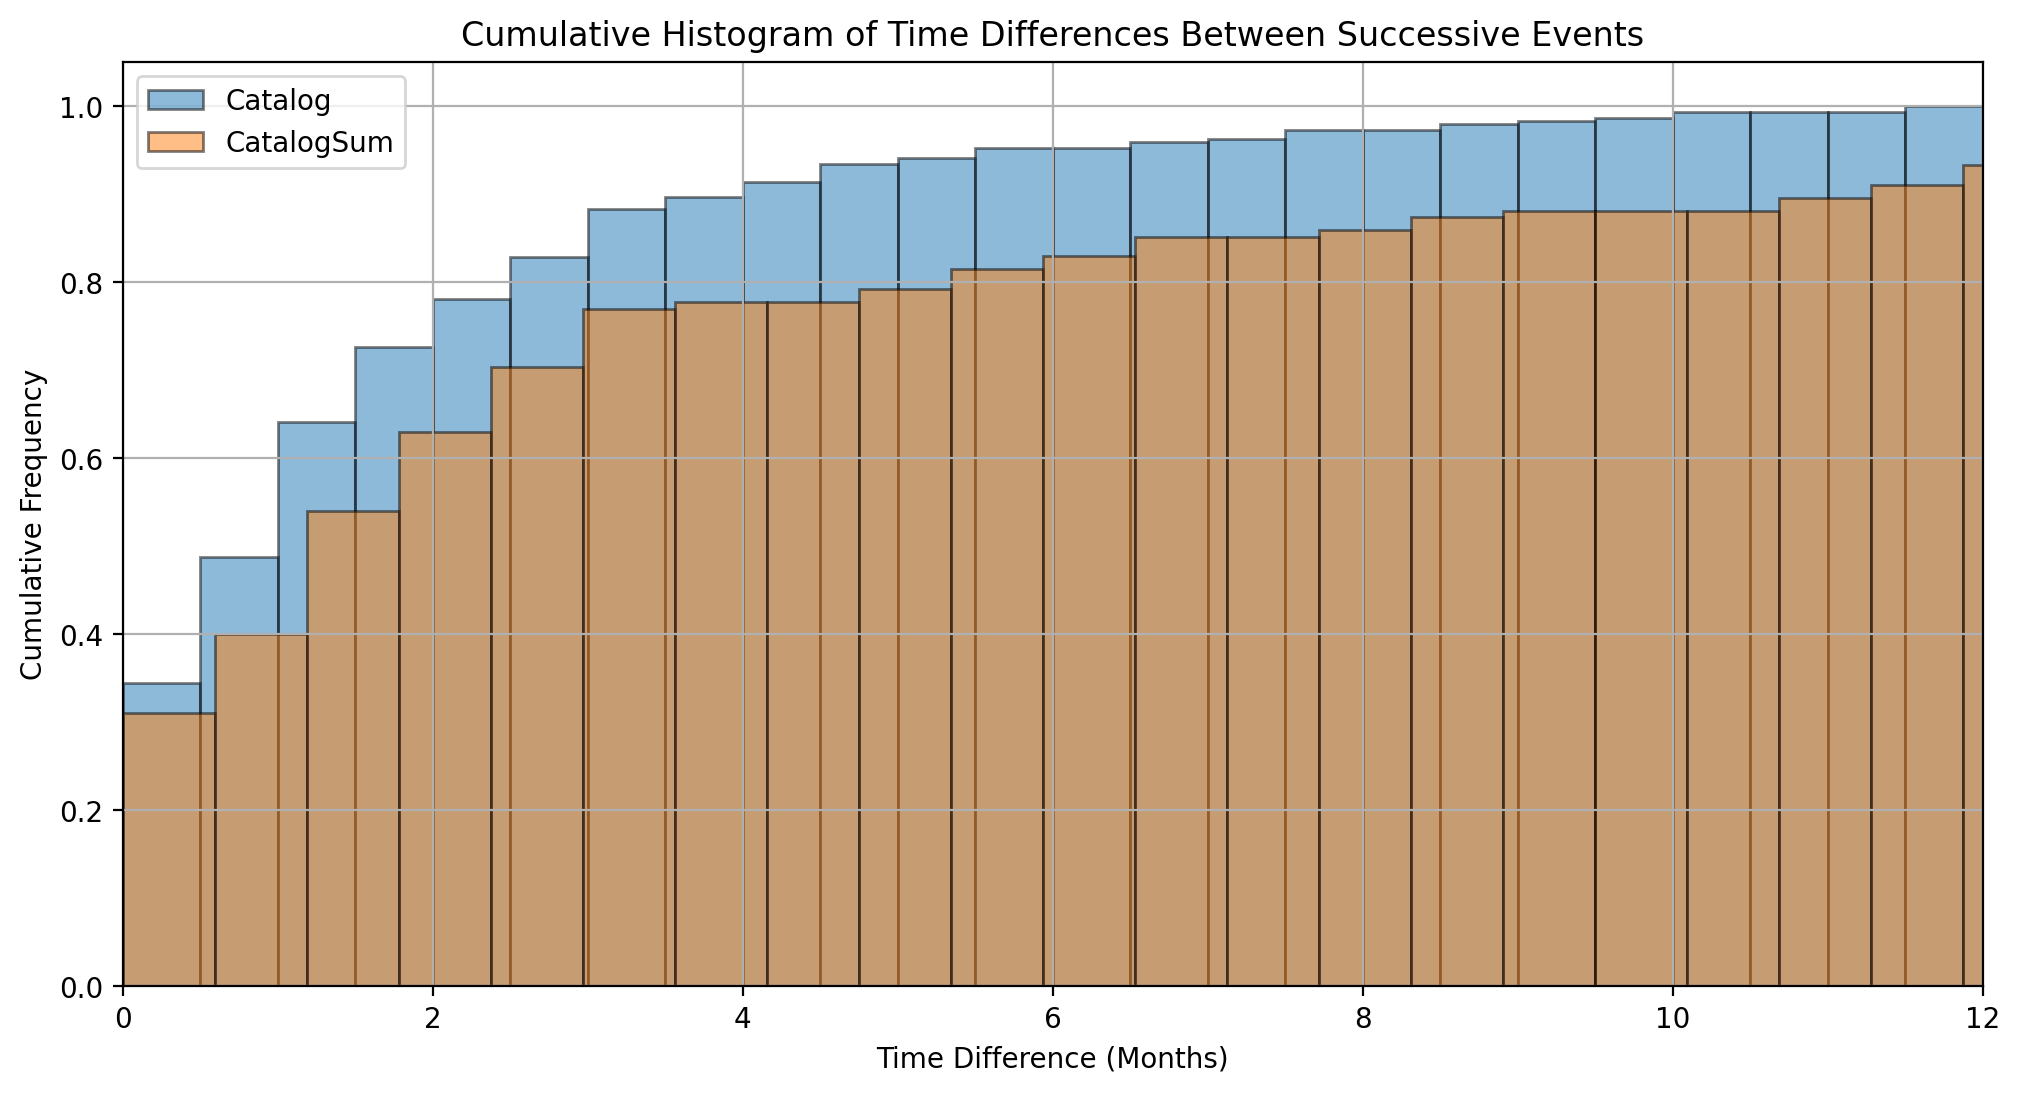

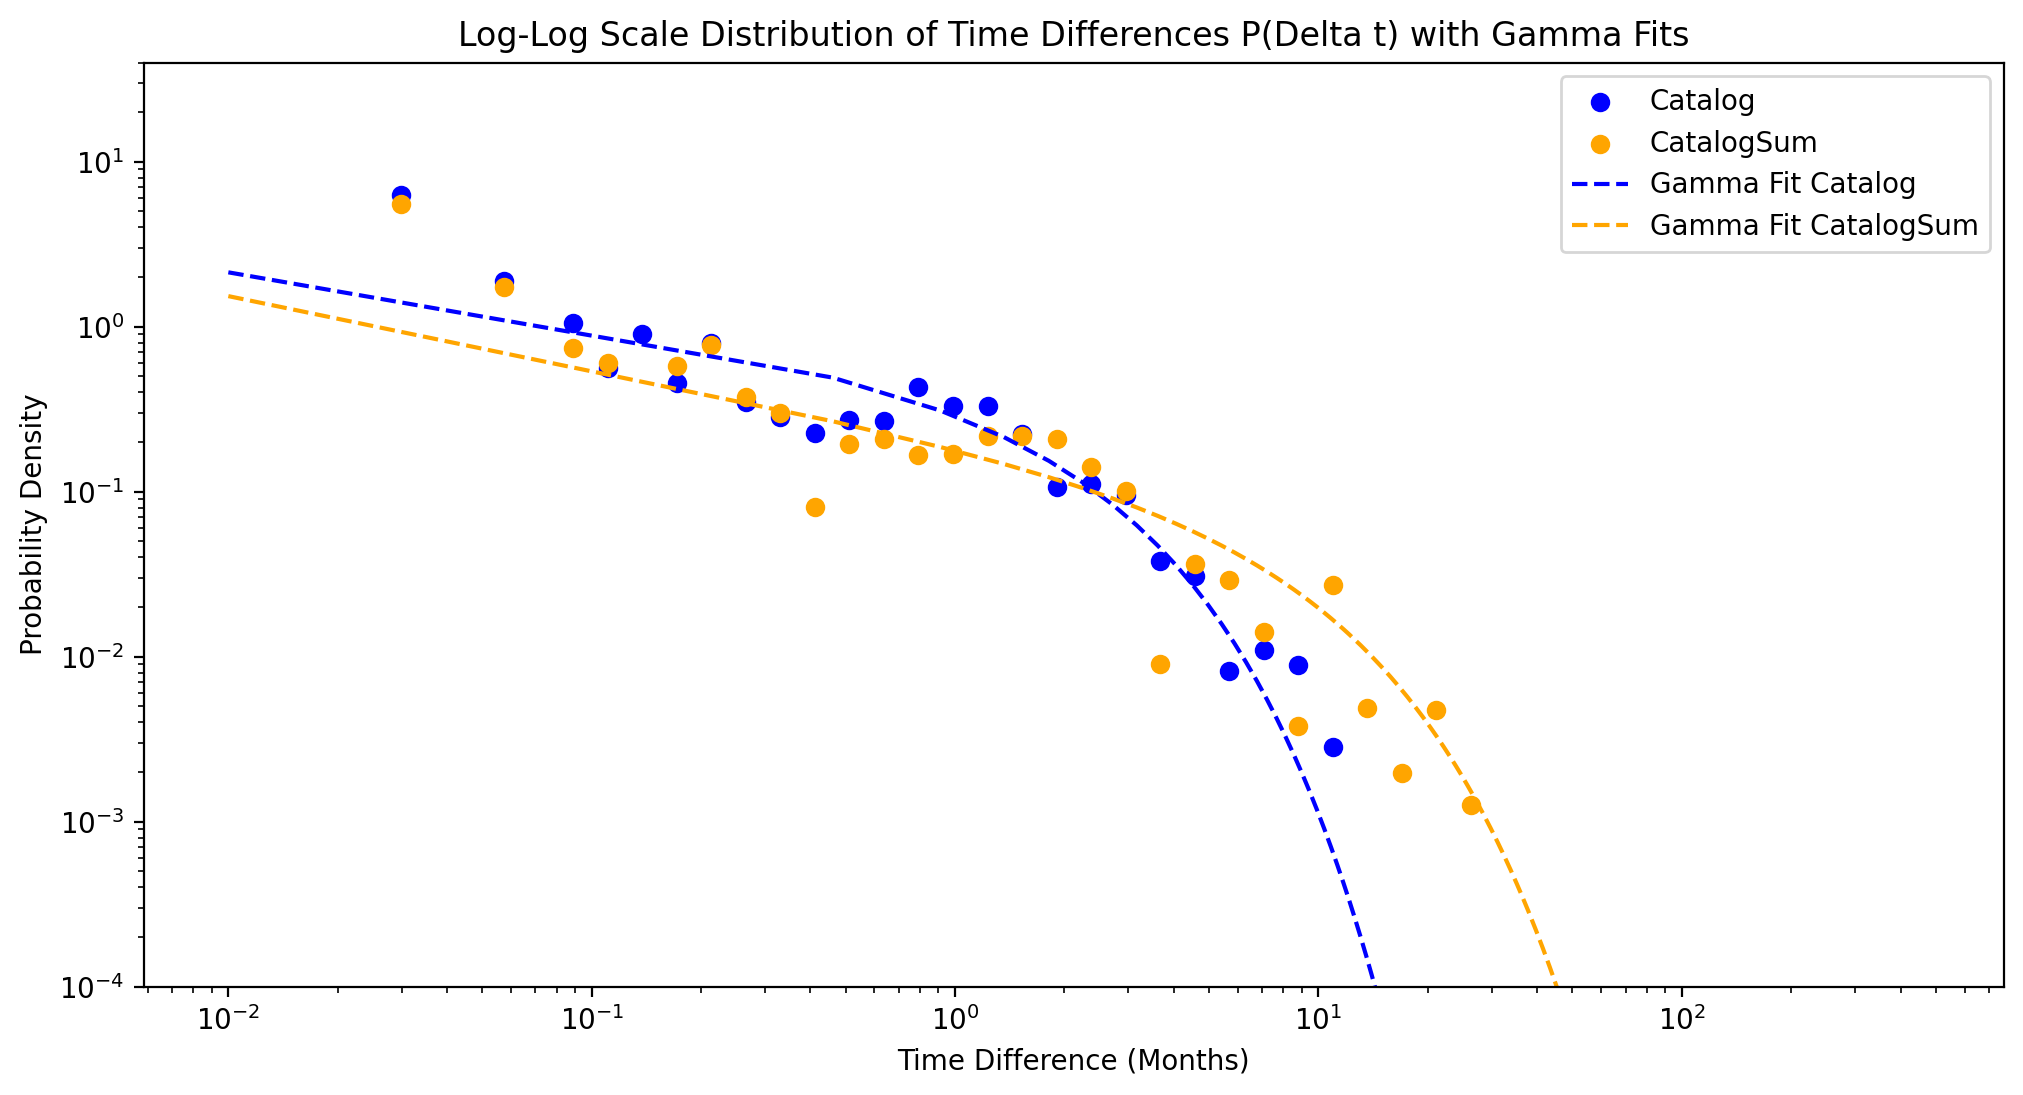

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, ks_2samp

# Load the catalog data
file_path = '/Users/zuhair/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Research/PhD_Monash/Paper2/time-series/data/SUeq_data.csv'
catalog = pd.read_csv(file_path)

catalog = catalog[(catalog['MW'] >= 6)]
#catalog = catalog[(catalog['DEPTH'] < 30)]

# For catalogsum, applying the specified filter
catalogsum = catalog[(catalog['LAT'] > -1)]

# Convert DATE to datetime and sort by DATETIME
catalog['DATETIME'] = pd.to_datetime(catalog['DATE'], errors='coerce')
catalog = catalog.sort_values('DATETIME').reset_index(drop=True)
catalog = catalog[(catalog['DATETIME'] > '1976-01-01')]
catalog = catalog.sort_values('DATETIME').reset_index(drop=True)

catalogsum['DATETIME'] = pd.to_datetime(catalogsum['DATE'], errors='coerce')
catalogsum = catalogsum.sort_values('DATETIME').reset_index(drop=True)
catalogsum = catalogsum[(catalogsum['DATETIME'] > '1976-01-01')]
catalogsum = catalogsum.sort_values('DATETIME').reset_index(drop=True)

# Calculate time differences for both catalogs
time_differences_catalog = np.diff(catalog['DATETIME'].values)
time_differences_catalogsum = np.diff(catalogsum['DATETIME'].values)

# Convert time differences to seconds
time_differences_seconds_catalog = time_differences_catalog.astype('timedelta64[s]').astype(int)
time_differences_seconds_catalogsum = time_differences_catalogsum.astype('timedelta64[s]').astype(int)

# Normalize time differences to months
time_differences_months_catalog = time_differences_seconds_catalog / (30.5 * 24 * 3600)
time_differences_months_catalogsum = time_differences_seconds_catalogsum / (30.5 * 24 * 3600)

# Perform Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(time_differences_months_catalog, time_differences_months_catalogsum)

# Print the results
print(f"Kolmogorov-Smirnov statistic: {ks_statistic}")
print(f"P-value: {p_value}")

# Plot cumulative histograms for both catalogs on the same graph
plt.figure(figsize=(12, 6), dpi=200)

# Cumulative histogram for catalog
plt.hist(time_differences_months_catalog, bins=24, density=True, 
         edgecolor='black', alpha=0.5, cumulative=True, label='Catalog')

# Cumulative histogram for catalogsum
plt.hist(time_differences_months_catalogsum, bins=48, density=True, 
         edgecolor='black', alpha=0.5, cumulative=True, label='CatalogSum')

plt.title('Cumulative Histogram of Time Differences Between Successive Events')
plt.xlabel('Time Difference (Months)')
plt.ylabel('Cumulative Frequency')
plt.xlim(0, 12)
plt.legend()
plt.grid(True)
plt.show()

# Plot the distribution P(Delta t) for the two cases on a log-log scale
plt.figure(figsize=(12, 6), dpi=200)

bin_edges = np.logspace(np.log10(0.01), np.log10(450), num=50)

# Histogram data
hist_catalog, bin_edges = np.histogram(time_differences_months_catalog, bins=bin_edges, density=True)
plt.scatter(bin_edges[:-1], hist_catalog, marker='o', color='blue', label='Catalog')

hist_catalogsum, bin_edges = np.histogram(time_differences_months_catalogsum, bins=bin_edges, density=True)
plt.scatter(bin_edges[:-1], hist_catalogsum, marker='o',  color='orange', label='CatalogSum')

# Fit Gamma distributions to the data
params_catalog = gamma.fit(time_differences_months_catalog)
params_catalogsum = gamma.fit(time_differences_months_catalogsum)

# Generate x values for plotting the Gamma PDF
x = np.linspace(bin_edges[0], bin_edges[-1], 1000)

# Plot Gamma PDF
pdf_fitted_catalog = gamma.pdf(x, *params_catalog)
plt.plot(x, pdf_fitted_catalog, 'b--', label='Gamma Fit Catalog')

pdf_fitted_catalogsum = gamma.pdf(x, *params_catalogsum)
plt.plot(x, pdf_fitted_catalogsum, 'orange', linestyle='--', label='Gamma Fit CatalogSum')

# Set log-log scale
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0001, 40)
plt.title('Log-Log Scale Distribution of Time Differences P(Delta t) with Gamma Fits')
plt.xlabel('Time Difference (Months)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


In [2]:
catalog

,LON,LAT,DEPTH,DATE,TIME,EVENT_ID,DEPFIX,DEPQUAL,EX,MO,...,SINSQ_SS_2,SINSQ_N_2,TYPE_2,CLASS1,TYPE1,Unnamed: 56,CLASS.1,Unnamed: 58,Unnamed: 59,DATETIME
0,119.861,-7.513,612.8,23/1/76,45:31.3,1666,FALSE,L1,19,1.580,...,0.913788,0.236147,THRUST,3.0,2.0,NaN,NaN,NaN,NaN,1976-01-23
1,96.246,3.438,22.2,20/6/76,53:13.6,742,FALSE,L1,19,3.550,...,0.132968,0.318958,THRUST,2.0,2.0,NaN,NaN,NaN,NaN,1976-06-20
2,114.785,-8.209,25.2,14/7/76,13:23.6,11,FALSE,L1,18,6.470,...,0.001218,0.075976,THRUST,1.0,2.0,NaN,NaN,NaN,NaN,1976-07-14
3,118.988,-10.091,24.5,2/1/77,55:31.5,784,1,L2,18,3.070,...,0.063519,0.274524,THRUST,2.0,2.0,NaN,NaN,NaN,NaN,1977-02-01
4,119.006,-11.044,15.0,2/9/77,36:27.1,1700,1,L1,18,2.230,...,0.047330,0.973130,NORM,3.0,1.0,NaN,NaN,NaN,NaN,1977-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,96.068,5.308,18.6,6/12/16,03:34.2,6,FALSE,L1,19,0.877,...,0.807831,0.165435,SS,1.0,3.0,NaN,NaN,NaN,NaN,2016-06-12
290,94.574,21.002,98.9,24/8/16,34:55.9,1664,FALSE,L1,19,1.712,...,0.137142,0.730653,ODD,3.0,0.0,NaN,NaN,NaN,NaN,2016-08-24
291,116.187,-11.226,16.5,9/6/16,13:07.1,2580,FALSE,L1,18,1.554,...,0.235040,0.764960,NORM,3.0,1.0,NaN,NaN,NaN,NaN,2016-09-06
292,108.104,-4.937,622.5,19/10/16,26:01.0,1674,FALSE,L1,19,1.025,...,0.998368,0.598568,THRUST,3.0,2.0,NaN,NaN,NaN,NaN,2016-10-19


/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/2240181852.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalog_filtered['DATETIME'] = pd.to_datetime(catalog_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/2240181852.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog_filtered['DATETIME'] = pd.to_datetime(catalog_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/2240181852.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to

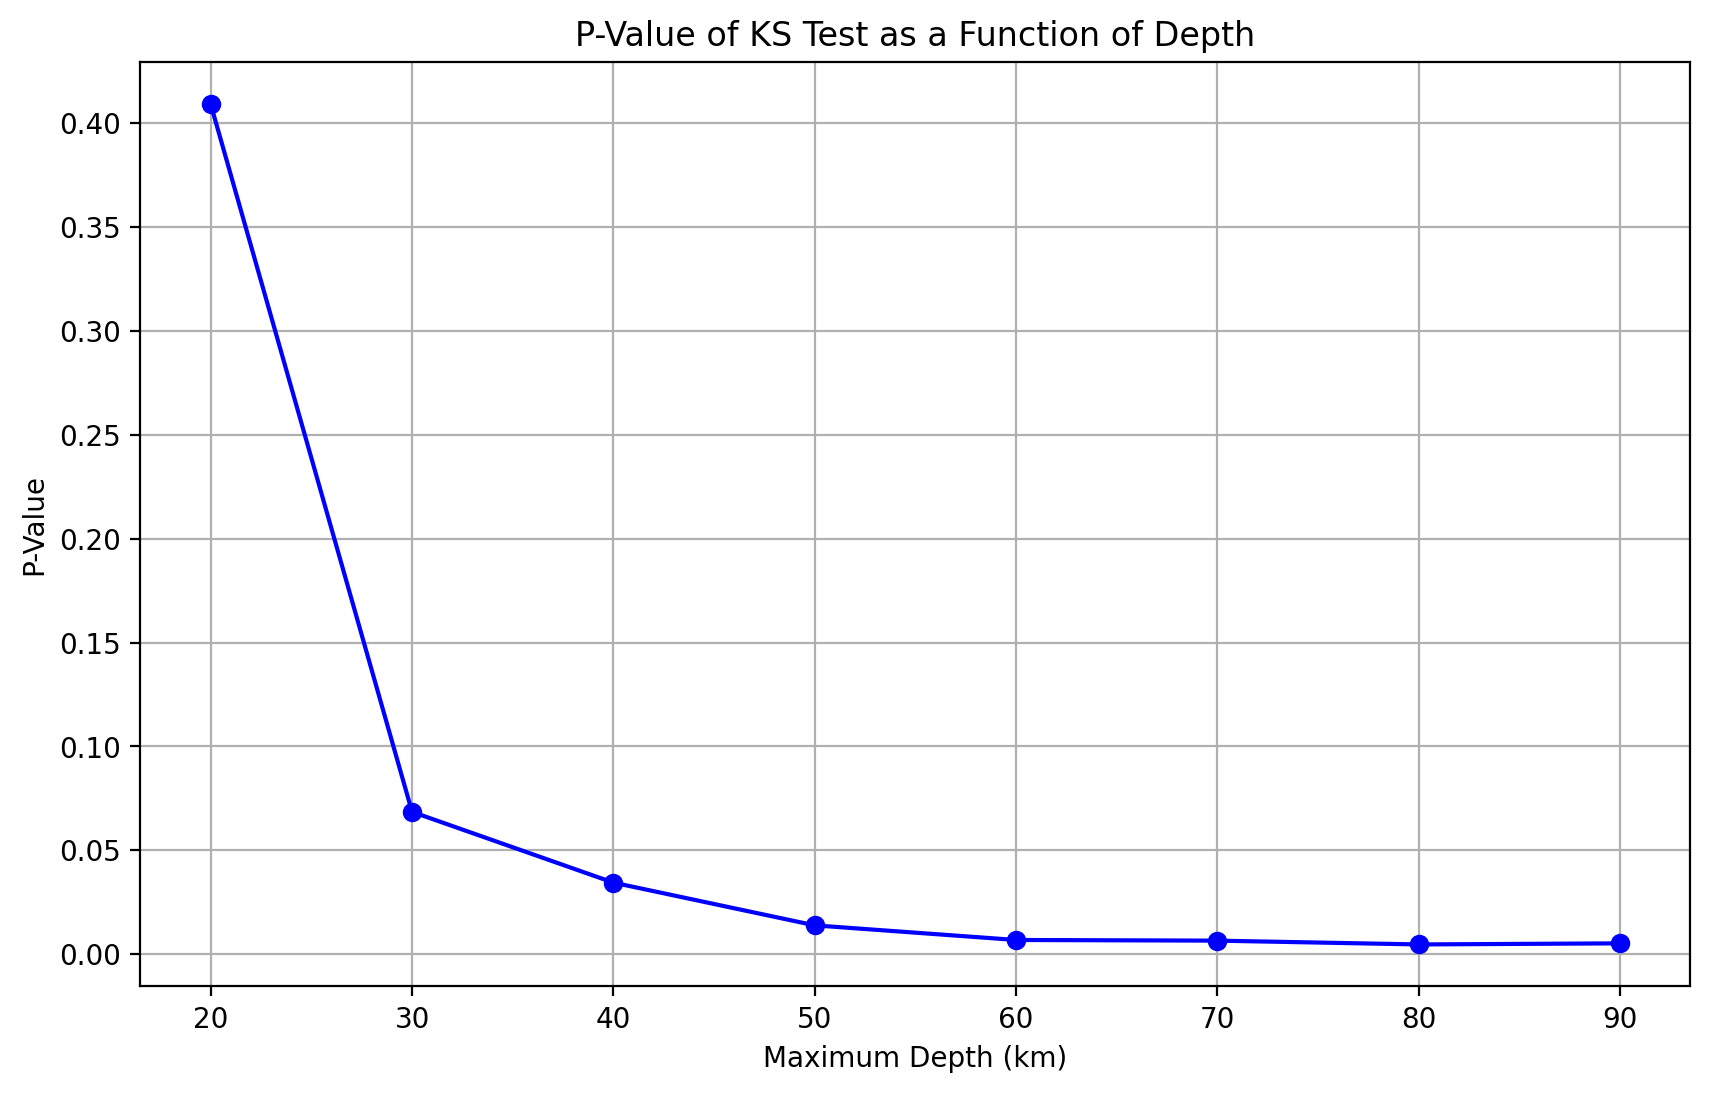

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, ks_2samp

# # Load the catalog data
# file_path = '/Users/zuhair/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Research/PhD_Monash/Paper2/time-series/data/SUeq_data.csv'
# catalog = pd.read_csv(file_path)

# Initialize an empty list to store p-values and corresponding depths
p_values = []
depth_ranges = range(20, 100, 10)  # From 50 km to 600 km in steps of 50 km

for max_depth in depth_ranges:
    # Filter the catalog for the given depth range
    catalog_filtered = catalog[(catalog['MW'] >= 6) & (catalog['DEPTH'] < max_depth)]
    catalogsum_filtered = catalog_filtered[(catalog_filtered['LAT'] > -1)]

    # Convert DATE to datetime and sort by DATETIME
    catalog_filtered['DATETIME'] = pd.to_datetime(catalog_filtered['DATE'], errors='coerce')
    catalog_filtered = catalog_filtered.sort_values('DATETIME').reset_index(drop=True)
    catalog_filtered = catalog_filtered[(catalog_filtered['DATETIME'] > '1976-01-01')]
    catalog_filtered = catalog_filtered.sort_values('DATETIME').reset_index(drop=True)

    catalogsum_filtered['DATETIME'] = pd.to_datetime(catalogsum_filtered['DATE'], errors='coerce')
    catalogsum_filtered = catalogsum_filtered.sort_values('DATETIME').reset_index(drop=True)
    catalogsum_filtered = catalogsum_filtered[(catalogsum_filtered['DATETIME'] > '1976-01-01')]
    catalogsum_filtered = catalogsum_filtered.sort_values('DATETIME').reset_index(drop=True)

    # Calculate time differences for both catalogs
    time_differences_catalog = np.diff(catalog_filtered['DATETIME'].values)
    time_differences_catalogsum = np.diff(catalogsum_filtered['DATETIME'].values)

    # Convert time differences to seconds
    time_differences_seconds_catalog = time_differences_catalog.astype('timedelta64[s]').astype(int)
    time_differences_seconds_catalogsum = time_differences_catalogsum.astype('timedelta64[s]').astype(int)

    # Normalize time differences to months
    time_differences_months_catalog = time_differences_seconds_catalog / (30.5 * 24 * 3600)
    time_differences_months_catalogsum = time_differences_seconds_catalogsum / (30.5 * 24 * 3600)

    # Perform Kolmogorov-Smirnov test
    ks_statistic, p_value = ks_2samp(time_differences_months_catalog, time_differences_months_catalogsum)

    # Store the p-value and corresponding depth
    p_values.append(p_value)

# Plot p-values as a function of depth
plt.figure(figsize=(10, 6), dpi=200)
#plt.xscale('log')
#plt.yscale('log')
plt.plot(depth_ranges, p_values, marker='o', linestyle='-', color='blue')
plt.title('P-Value of KS Test as a Function of Depth')
plt.xlabel('Maximum Depth (km)')
plt.ylabel('P-Value')
#plt.ylim(0, 0.02)  # Since p-values range between 0 and 1
plt.grid(True)
plt.show()


/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalog_filtered['DATETIME'] = pd.to_datetime(catalog_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalogsum_filtered['DATETIME'] = pd.to_datetime(catalogsum_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalog_filt

/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalogsum_filtered['DATETIME'] = pd.to_datetime(catalogsum_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalog_filtered['DATETIME'] = pd.to_datetime(catalog_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalogsum_f

/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalogsum_filtered['DATETIME'] = pd.to_datetime(catalogsum_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalog_filtered['DATETIME'] = pd.to_datetime(catalog_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalogsum_f

/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalogsum_filtered['DATETIME'] = pd.to_datetime(catalogsum_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalog_filtered['DATETIME'] = pd.to_datetime(catalog_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalogsum_f

/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalogsum_filtered['DATETIME'] = pd.to_datetime(catalogsum_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalog_filtered['DATETIME'] = pd.to_datetime(catalog_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalogsum_f

/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalog_filtered['DATETIME'] = pd.to_datetime(catalog_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalogsum_filtered['DATETIME'] = pd.to_datetime(catalogsum_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalog_filt

/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalogsum_filtered['DATETIME'] = pd.to_datetime(catalogsum_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalog_filtered['DATETIME'] = pd.to_datetime(catalog_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalogsum_f

/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalog_filtered['DATETIME'] = pd.to_datetime(catalog_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalogsum_filtered['DATETIME'] = pd.to_datetime(catalogsum_filtered['DATE'], errors='coerce')
/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/685321652.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalog_filt

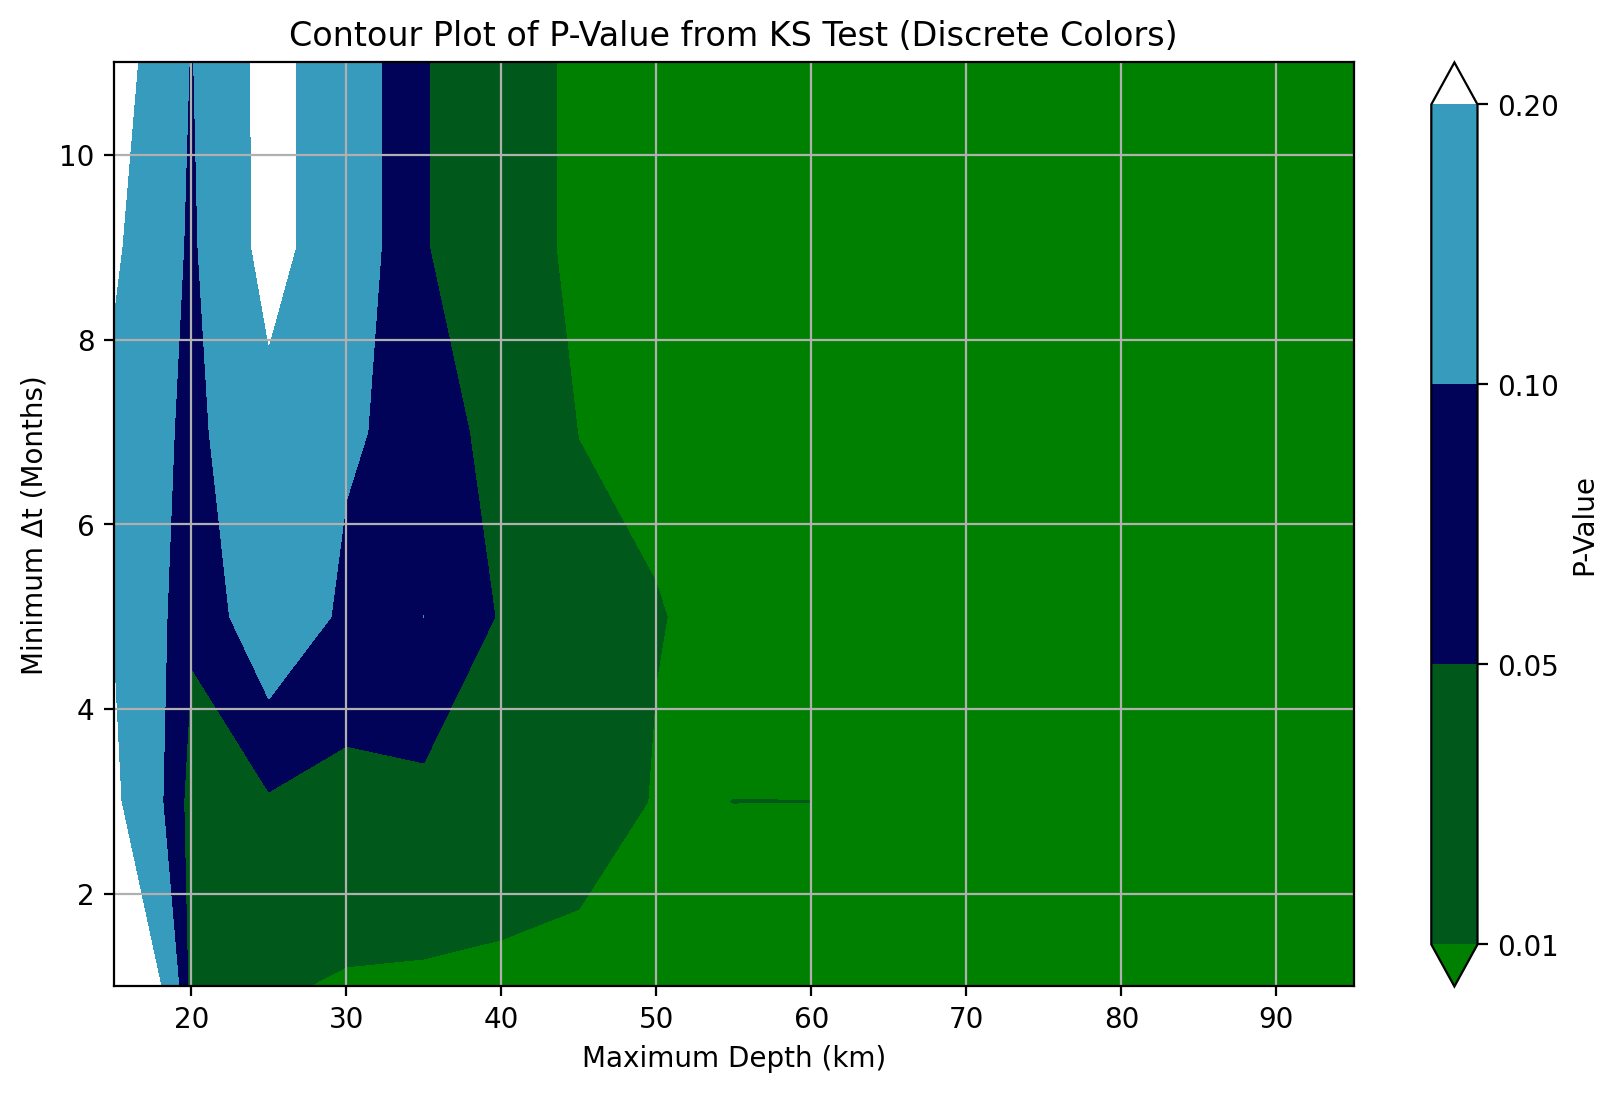

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# # Load the catalog data
file_path = '/Users/zuhair/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Research/PhD_Monash/Paper2/time-series/data/SUeq_data.csv'
catalog = pd.read_csv(file_path)

# Define the ranges for delta t (in months) and depth
delta_t_ranges = np.arange(1, 12, 2)  # Delta t range from 1 to 11 months in steps of 1 month
depth_ranges = range(15, 100, 5)       # Depth range from 15 km to 50 km in steps of 5 km

# Initialize a matrix to store the p-values
p_values_matrix = np.zeros((len(delta_t_ranges), len(depth_ranges)))

for i, min_delta_t in enumerate(delta_t_ranges):
    for j, max_depth in enumerate(depth_ranges):
        # Filter the catalog for the given depth range
        catalog_filtered = catalog.loc[(catalog['DEPTH'] < max_depth)].copy()
        catalogsum_filtered = catalog_filtered.loc[(catalog_filtered['LAT'] > -1)].copy()

        # Convert DATE to datetime and sort by DATETIME
        catalog_filtered['DATETIME'] = pd.to_datetime(catalog_filtered['DATE'], errors='coerce')
        catalog_filtered = catalog_filtered.sort_values('DATETIME').reset_index(drop=True)
        catalog_filtered = catalog_filtered.loc[(catalog_filtered['DATETIME'] > '1976-01-01')]

        catalogsum_filtered['DATETIME'] = pd.to_datetime(catalogsum_filtered['DATE'], errors='coerce')
        catalogsum_filtered = catalogsum_filtered.sort_values('DATETIME').reset_index(drop=True)
        catalogsum_filtered = catalogsum_filtered.loc[(catalogsum_filtered['DATETIME'] > '1976-01-01')]

        # Calculate time differences for both catalogs
        time_differences_catalog = np.diff(catalog_filtered['DATETIME'].values)
        time_differences_catalogsum = np.diff(catalogsum_filtered['DATETIME'].values)

        # Convert time differences to seconds
        time_differences_seconds_catalog = time_differences_catalog.astype('timedelta64[s]').astype(int)
        time_differences_seconds_catalogsum = time_differences_catalogsum.astype('timedelta64[s]').astype(int)

        # Normalize time differences to months
        time_differences_months_catalog = time_differences_seconds_catalog / (30.5 * 24 * 3600)
        time_differences_months_catalogsum = time_differences_seconds_catalogsum / (30.5 * 24 * 3600)

        # Filter for Δt >= min_delta_t months
        time_differences_months_catalog = time_differences_months_catalog[time_differences_months_catalog < min_delta_t]
        time_differences_months_catalogsum = time_differences_months_catalogsum[time_differences_months_catalogsum < min_delta_t]

        # Perform Kolmogorov-Smirnov test
        if len(time_differences_months_catalog) > 0 and len(time_differences_months_catalogsum) > 0:
            ks_statistic, p_value = ks_2samp(time_differences_months_catalog, time_differences_months_catalogsum)
        else:
            p_value = np.nan  # Assign NaN if there's insufficient data for the test

        # Store the p-value in the matrix
        p_values_matrix[i, j] = p_value

# Plotting the contour plot
plt.figure(figsize=(10, 6), dpi=200)

# Define discrete levels for the contour plot
levels = [0.01, 0.05, 0.1, 0.2]

# Create a contour plot with Delta t on the x-axis and Depth on the y-axis
X, Y = np.meshgrid(depth_ranges, delta_t_ranges)
contour = plt.contourf(X, Y, p_values_matrix, levels=levels, cmap='ocean', extend='both')

# Add color bar to indicate p-values
plt.colorbar(contour, label='P-Value')

plt.title('Contour Plot of P-Value from KS Test (Discrete Colors)')
plt.xlabel('Maximum Depth (km)')
plt.ylabel('Minimum Δt (Months)')
plt.yscale('linear')
plt.grid(True)
plt.show()

/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_24751/45831758.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalog['DATETIME'] = pd.to_datetime(catalog['DATE'], errors='coerce')


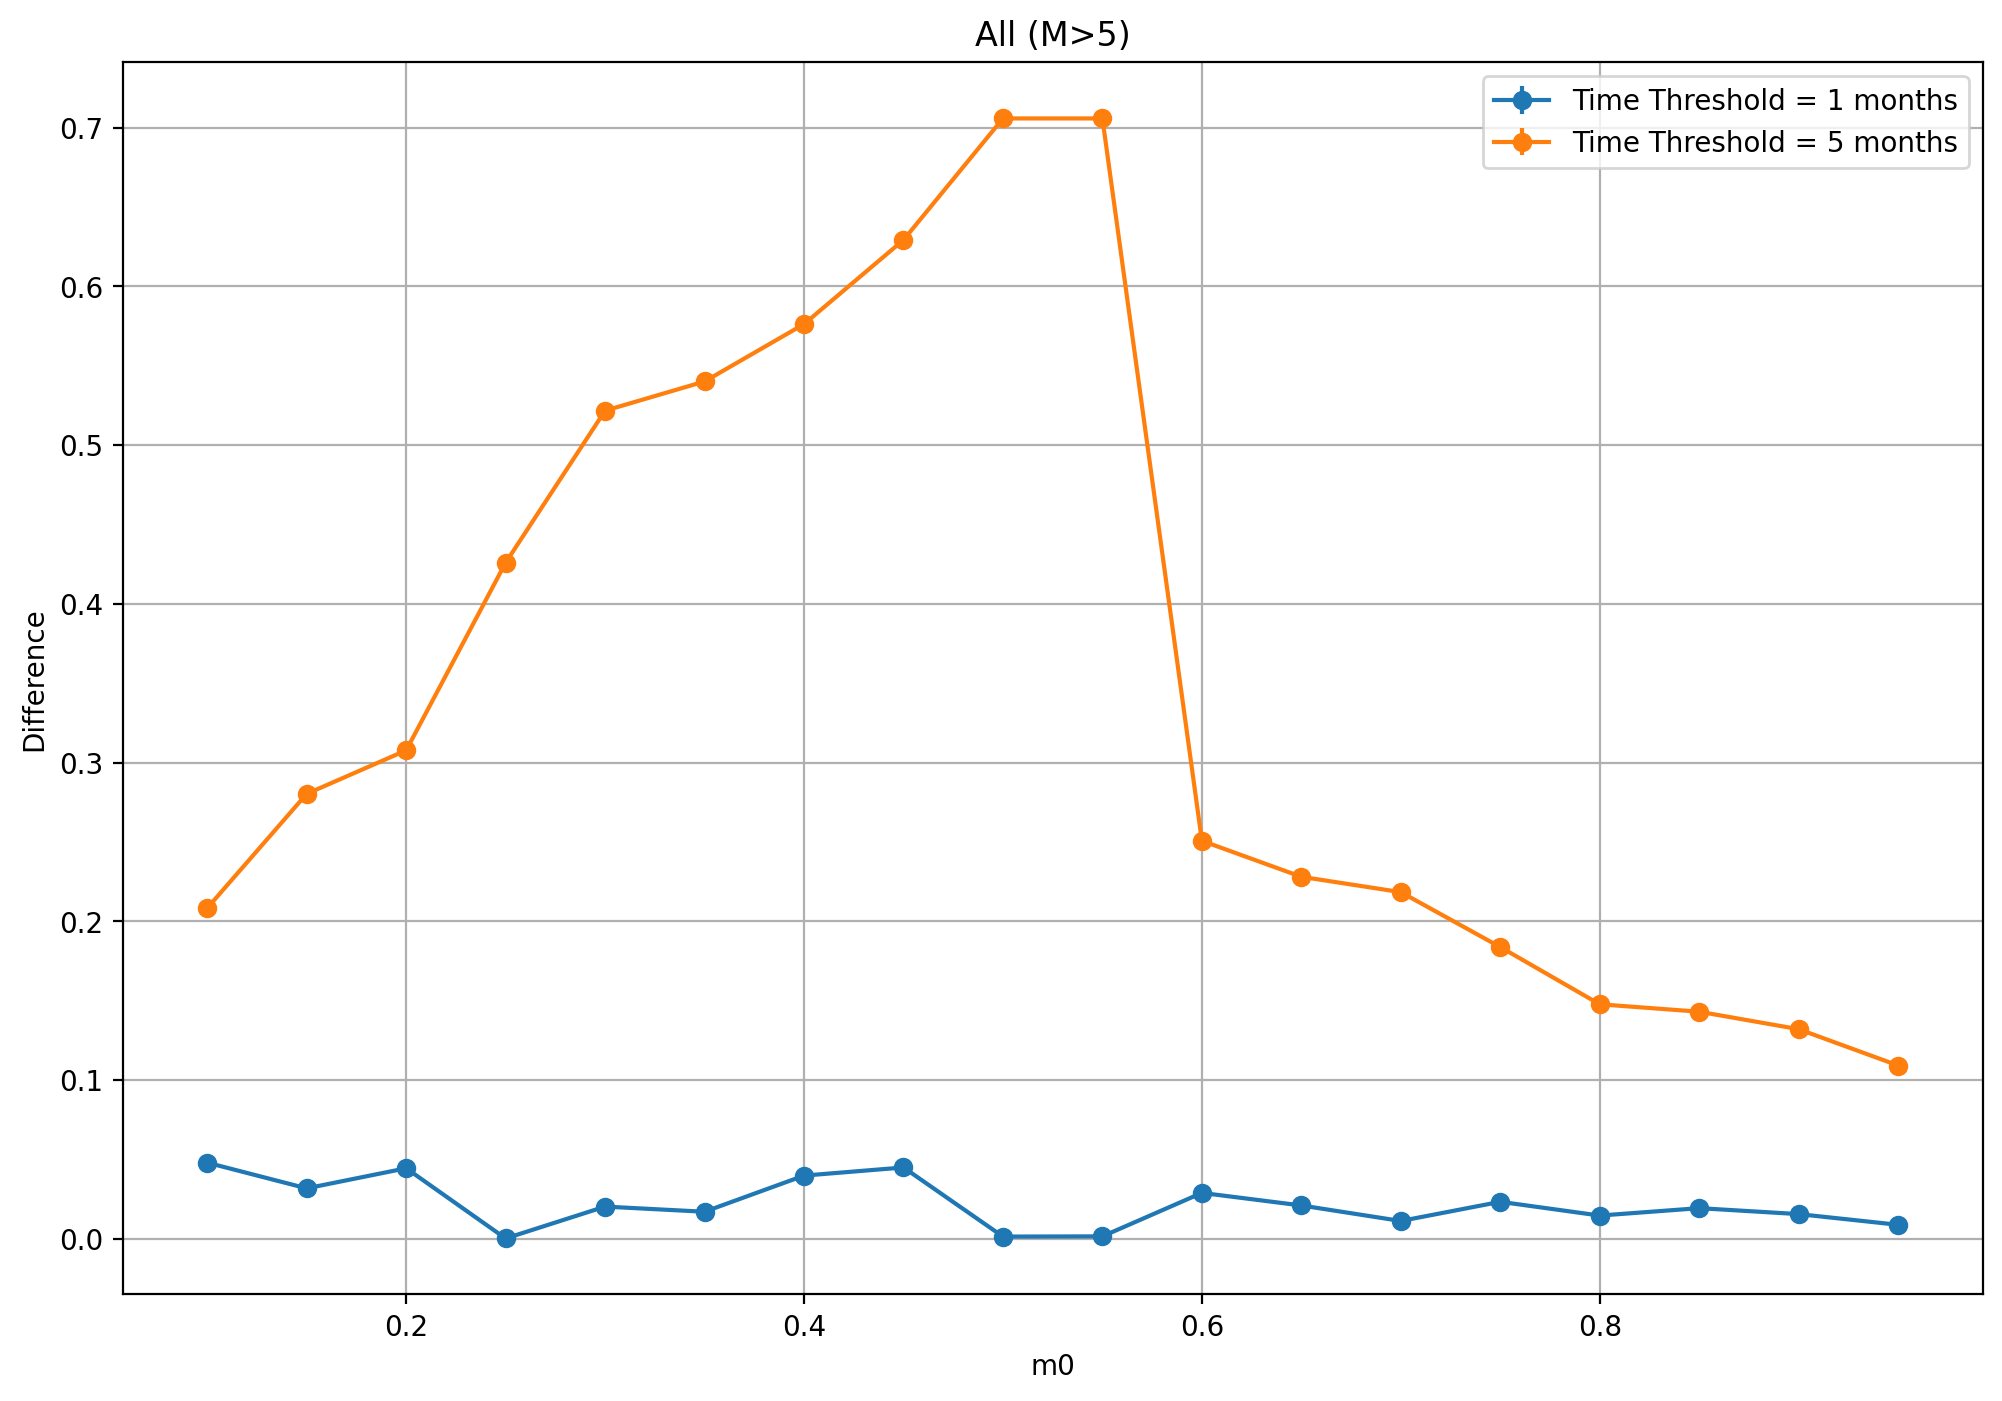

In [5]:
# # Load the catalog data
file_path = '/Users/zuhair/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Research/PhD_Monash/Paper2/time-series/data/SUeq_data.csv'
catalog = pd.read_csv(file_path)


# Initialize a dictionary to store the results for each combination of depth and time thresholds
results = {}
sresults = {}
errors = {}

time_thresholds = [1 * 30.5 * 24 * 3600,  # 1 month
                     # 2 months
                     # 3 months
                     # 4 months
                   5 * 30.5 * 24 * 3600,  # 5 months
                   
                
                   9 * 30.5 * 24 * 3600  # 3 months
                     # 4 months
                    # 5 months
                   ]  # 6 months

mag_thresholds = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35,0.4, 0.45, 0.5,0.55, 0.6,0.65, 0.7, 0.75, 0.8,0.85, 0.9,0.95]


# Combine DATE and TIME and convert to DATETIME
catalog['DATETIME'] = pd.to_datetime(catalog['DATE'], errors='coerce')
catalog = catalog.sort_values('DATETIME').reset_index(drop=True)

t = np.zeros(len(catalog), dtype=np.float64)
z = np.zeros(len(catalog), dtype=np.float64)
q = np.zeros(len(catalog), dtype=np.float64)

ne = len(t) - 1

dt = np.zeros(ne , dtype=np.float64)
dq = np.zeros(ne  , dtype=np.float64)
dqs = np.zeros(ne , dtype=np.float64)
dts = np.zeros(ne , dtype=np.float64)

#catalog = catalog.dropna(subset=['DATETIME'])

t = catalog['DATETIME'].apply(lambda x: x.timestamp()).values  # Convert datetime to timestamp (seconds since epoch)
z = catalog['DEPTH'].values
q = catalog['MW'].values


z0 = 1000

for t0 in time_thresholds:
    results[t0] = {}  # Initialize the dictionary for this time threshold
    sresults[t0] = {}  # Initialize the dictionary for this time threshold
    errors[t0] = {}
    for m0 in mag_thresholds:

        # Time difference calculation
        ntot = 0
        nn = 0

        for i in range(ne - 1):
            
            dq[i] = abs(q[i + 1] - q[i])
            dt[i] = abs(t[i + 1] - t[i])
            if z[i] <= z0:
                if dt[i] >= t0:
                    if dq[i] <= m0:
                        nn += 1
                    ntot += 1
                  

        # Calculate the ratio for real data
        if ntot > 0:
            real_data_ratio = nn*1./ ntot
            results[t0][m0] = real_data_ratio  # Store the result for real data
            error = np.sqrt(real_data_ratio * (1 - real_data_ratio) / ntot)
            errors[t0][m0] = error*0  #!!!!!!!    
        
        else:
            results[t0][m0] = np.nan  # Store NaN if ntot is 0 to avoid errors
            errors[t0][m0] = np.nan  
      
            
            

        # Perform randomization and store the average randomized ratio
        randomized_ratios = []

        for nreal in range(100):
            nns = 0
            ntot = 0
            for i in range(ne - 1):
                tr = t[int(np.random.rand() * ne)]
                qr = t[int(np.random.rand() * ne)]
                dts[i] = abs(t[i + 1] - tr)
                dqs[i] = abs(q[i + 1] - qr)

                if dts[i] == 0:
                    continue

                if z[i] <= z0:
                    if dts[i]>= t0:
                        if dq[i] <= m0:
                            nns += 1
                        ntot += 1

            if ntot > 0:
                randomized_ratios.append(nns*1./ ntot)
            else:
                randomized_ratios.append(np.nan)  # Store NaN if ntot is 0 to avoid errors

        average_randomized_ratio = np.nanmean(randomized_ratios)  # Use nanmean to avoid issues with NaN values
        sresults[t0][m0] = average_randomized_ratio  # Store the average of the randomized ratios

# Compute the difference between the real data ratio and the computed average of the randomized ratios
differences = {}
for t0 in time_thresholds:
    for m0 in mag_thresholds:
        if not np.isnan(results[t0][m0]) and not np.isnan(sresults[t0][m0]):
            difference = abs(results[t0][m0] - sresults[t0][m0])
            differences[(t0, m0)] = difference
        else:
            differences[(t0, m0)] = np.nan  # Store NaN if any part of the calculation is NaN

# Prepare the data for plotting
time_thresholds_months = [1,5]  # in months
mag_values = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35,0.4, 0.45, 0.5,0.55, 0.6,0.65, 0.7, 0.75, 0.8,0.85, 0.9,0.95]

# Create a matrix of differences for plotting
difference_matrix_SUM = np.zeros((len(time_thresholds_months), len(mag_values)))
error_matrix_SUM = np.zeros((len(time_thresholds_months), len(mag_values)))
 


for j, t_month in enumerate(time_thresholds_months):
    for k, mag in enumerate(mag_values):
        t_seconds = t_month * 30.5 * 24 * 3600  # Convert months to seconds
        difference_matrix_SUM[j, k] = differences.get((t_seconds, mag), np.nan)
        error_matrix_SUM[j, k] = errors[t_seconds].get(mag, np.nan)


    
#Plotting the differences
plt.figure(figsize=(12, 8), dpi=200)

for i, t_month in enumerate(time_thresholds_months):
    plt.errorbar(
        mag_values,
        difference_matrix_SUM[i, :],
        yerr=error_matrix_SUM[i, :],
        marker='o',
        linestyle='-',
        label=f'Time Threshold = {t_month} months'
    )
plt.title('All (M>5)')
plt.xlabel('m0')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.show()